<div style="text-align: center;">
<strong>Machine Learning for Scientific Computing and Numerical Analysis - PC 4</strong>
</div>
<div style="text-align: center;">
<strong>Finite element approximation of a function</strong>
</div>
<div style="text-align: center;">
<p>Loïc Gouarin, Samuel Kokh, Hadrien Montanelli</p>
</div>
<div style="text-align: center;">
<i>2024 - 2025</i>
</div>

# 1 Approximation of a function by a P1 finite element basis

In this notebook we recall a few basic elements about the P1 approximation of functions.

In [1]:
from math import pi
import matplotlib.pyplot as plt
import numpy as np    
from numpy.linalg import inv, norm
from scipy.linalg import eigvals, expm
from scipy.sparse import diags, eye
from scipy.sparse.linalg import spsolve
import time

## 1.1 Shape function

Our goal is to approximate a function $u: [-1, 1] \to \mathbb{R}$ with a P1 finite element basis.

First we define a shape function (sometimes called "hat function")
$\phi: \mathbb{R} \to \mathbb{R}$:
$$
\phi(x) = \left\{
\begin{array}{ll}
1 - |x| & \text{if } |x| \leq 1, \\
0 & \text{otherwise}.
\end{array}
\right.
$$

### Exercise

{exercise}
Define the function $\phi$ using a lambda function.

In [2]:
# Shape function:
phi = lambda x: np.where(np.abs(x) <= 1, 1 - np.abs(x), 0)

### Validation

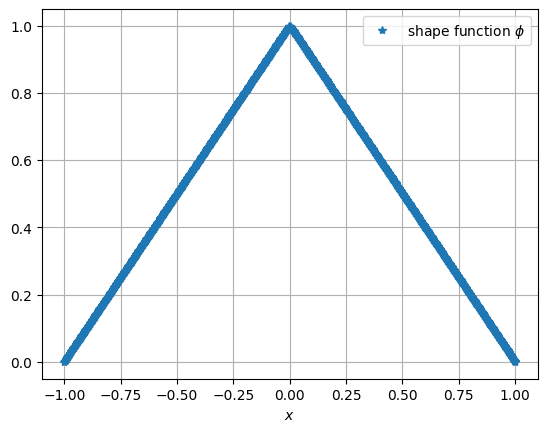

In [3]:
# Plot shape function:
xeval = np.linspace(-1, 1, 1000) # evaluation grid
plt.figure()
plt.plot(xeval, phi(xeval), '*', label=r'shape function $\phi$')
plt.xlabel(r"$x$")
plt.legend()
plt.grid()

## 1.2 Basis functions

Consider now the set of $m+2$ points $x_j = -1 + jh$, $h = 2/(m+1)$, for $j=0,\ldots,m+1$, which yields a discretization grid of $[-1,1]$.

In [4]:
# Grid:
m = 100
h = 2/(m + 1)
xx = np.linspace(-1, 1, m + 2)

The function $\phi$ allows us to define a basis of functions $\Phi_j$:
$$
\Phi_j(x) = \phi\left(\frac{x - x_j}{h}\right),
\qquad
j=1,\ldots,m.
$$

### Exercise

{exercise}
Define the function $\Phi_j(x) = \Phi(j,x)$ using a two-parameter lambda function.

In [5]:
Phi = lambda j, x: phi((x - xx[j])/h)

### Validation

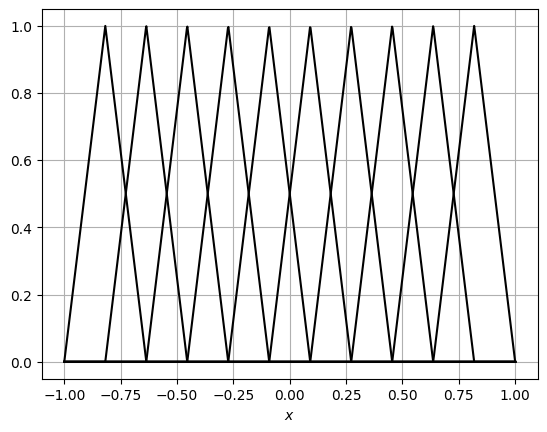

In [6]:
# Plot basis functions:
m = 10
meval = 1000
h = 2.0/(m + 1)
heval = 2.0/meval
xx = np.linspace(-1, 1, m + 2) # computation grid
xeval = np.linspace(-1, 1, meval + 1) # evaluation grid
plt.figure()
plt.grid()
plt.xlabel(r"$x$")
for j in range(1, m + 1):
    plt.plot(xeval, Phi(j, xeval), 'k')

## 1.3 Approximating a function

Now we want to approximate a function $u$. Suppose that $u(x=\pm 1) = 0$.

In [7]:
# An example of function u:
u = lambda x: np.sin(np.pi*x)*np.cos(-x**2+5)

We can approximate $u$ via a linear combination $u_h$ of the basis functions $\Phi_j$:
$$
u_h(x) = \sum_{j=1}^m u_j \Phi_j(x),
\qquad
u_j = u(x_j),
\qquad
j=1,\ldots,m.
$$

### Exercise

{exercise}
Define the function $u_h$ using a one parameter lambda function.

In [8]:
uh = lambda x: sum([u(xx[j]) * Phi(j, x) for j in range(1, m + 1)])

### Validation

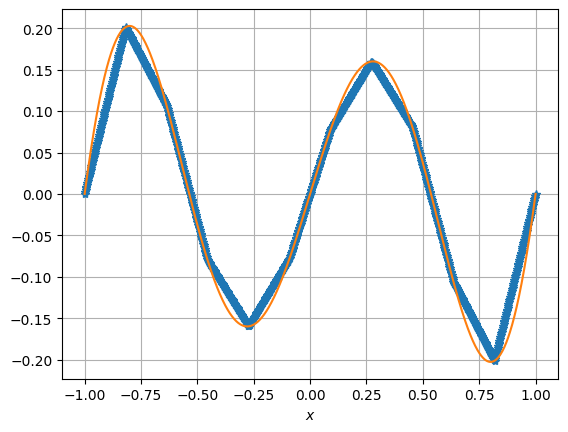

In [9]:
plt.figure()
plt.grid()
plt.xlabel(r"$x$")
plt.plot(xeval, uh(xeval), '*')
plt.plot(xeval, u(xeval), '-');

## 1.4 Error and convergence

### Exercise

{exercise}
Compute the error $e_h$ for $m=1,\ldots,500$.

In [10]:
m_values = np.arange(1, 500)
eh_values = np.zeros_like(m_values, dtype=float)
for i,m in enumerate(m_values):
    h = 2.0/(m + 1)
    xx = np.linspace(-1, 1, m + 2)
    Phi = lambda j, x: phi((x - xx[j])/h)
    uh = lambda x: sum([u(xx[j]) * Phi(j, x) for j in range(1, m + 1)])
    eh_values[i] = np.max(u(xeval) - uh(xeval))

### Validation

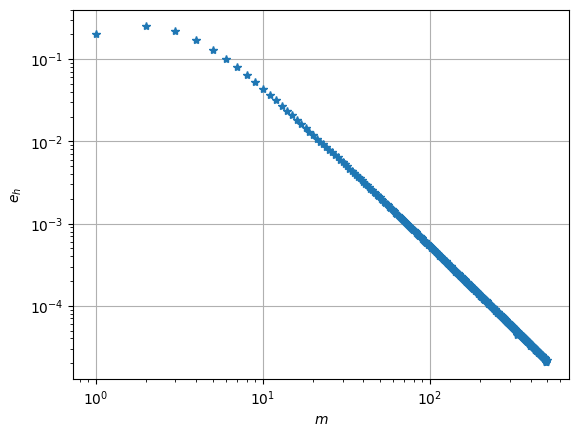

In [11]:
plt.figure()
plt.grid()
plt.xlabel(r"$m$")
plt.ylabel(r"$e_h$")
plt.loglog()
plt.plot(m_values, eh_values, '*');